<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/BY_Autocorrelation%26Corelation__Final_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from datetime import datetime
import calendar

go_data = pd.read_csv("https://github.com/Jenarth/SCS3250-Group-2-Final-Project/raw/master/Final%20GO%20Dataset.csv", parse_dates=['Date'])
weather_data = pd.read_csv("https://github.com/Jenarth/SCS3250-Group-2-Final-Project/raw/master/Final%20Weather%20Data.csv", parse_dates=['Date/Time'])

In [21]:
monthly_mean = weather_data.groupby(by="year_month")['Mean Temp (°C)','Total Precip (mm)'].mean()
monthly_mean = monthly_mean.rename(columns={'Mean Temp (°C)':'Monthly Mean Temp (°C)', 'Total Precip (mm)':'Monthly Mean Precip (mm)'})
weather_data = pd.merge(weather_data, monthly_mean, how='left', left_on='year_month', right_on='year_month')
weather_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),year_month,Monthly Mean Temp (°C),Monthly Mean Precip (mm)
0,2017-03-01,2017,3,1,13.1,-1.9,5.6,18.4,0.0,2017-03,0.116129,2.490323
1,2017-03-02,2017,3,2,-1.3,-6.4,-3.9,0.2,0.5,2017-03,0.116129,2.490323
2,2017-03-03,2017,3,3,-4.3,-8.1,-6.2,0.0,0.5,2017-03,0.116129,2.490323
3,2017-03-04,2017,3,4,-6.5,-11.9,-9.2,0.2,0.5,2017-03,0.116129,2.490323
4,2017-03-05,2017,3,5,-0.4,-10.6,-5.5,0.0,0.5,2017-03,0.116129,2.490323
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2020-02-26,2020,2,26,4.1,-3.2,0.4,11.8,0.0,2020-02,-1.906897,2.137931
1093,2020-02-27,2020,2,27,-2.7,-5.3,-4.0,3.1,0.0,2020-02,-1.906897,2.137931
1094,2020-02-28,2020,2,28,-2.5,-9.4,-5.9,1.1,0.0,2020-02,-1.906897,2.137931
1095,2020-02-29,2020,2,29,-3.2,-12.8,-8.0,1.2,0.0,2020-02,-1.906897,2.137931


In [22]:
weather_data['Weekday'] = weather_data.apply(lambda row: calendar.day_name[datetime.weekday(row['Date/Time'])], axis = 1)
weather_data

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),year_month,Monthly Mean Temp (°C),Monthly Mean Precip (mm),Weekday
0,2017-03-01,2017,3,1,13.1,-1.9,5.6,18.4,0.0,2017-03,0.116129,2.490323,Wednesday
1,2017-03-02,2017,3,2,-1.3,-6.4,-3.9,0.2,0.5,2017-03,0.116129,2.490323,Thursday
2,2017-03-03,2017,3,3,-4.3,-8.1,-6.2,0.0,0.5,2017-03,0.116129,2.490323,Friday
3,2017-03-04,2017,3,4,-6.5,-11.9,-9.2,0.2,0.5,2017-03,0.116129,2.490323,Saturday
4,2017-03-05,2017,3,5,-0.4,-10.6,-5.5,0.0,0.5,2017-03,0.116129,2.490323,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2020-02-26,2020,2,26,4.1,-3.2,0.4,11.8,0.0,2020-02,-1.906897,2.137931,Wednesday
1093,2020-02-27,2020,2,27,-2.7,-5.3,-4.0,3.1,0.0,2020-02,-1.906897,2.137931,Thursday
1094,2020-02-28,2020,2,28,-2.5,-9.4,-5.9,1.1,0.0,2020-02,-1.906897,2.137931,Friday
1095,2020-02-29,2020,2,29,-3.2,-12.8,-8.0,1.2,0.0,2020-02,-1.906897,2.137931,Saturday


In [23]:
weather_data['Delta Temp (°C)'] = weather_data.apply(lambda row: row["Mean Temp (°C)"] - row["Monthly Mean Temp (°C)"], axis=1)
weather_data['Delta Percip (mm)'] = weather_data.apply(lambda row: row["Total Precip (mm)"] - row["Monthly Mean Precip (mm)"], axis=1)
weather_data

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),year_month,Monthly Mean Temp (°C),Monthly Mean Precip (mm),Weekday,Delta Temp (°C),Delta Percip (mm)
0,2017-03-01,2017,3,1,13.1,-1.9,5.6,18.4,0.0,2017-03,0.116129,2.490323,Wednesday,5.483871,15.909677
1,2017-03-02,2017,3,2,-1.3,-6.4,-3.9,0.2,0.5,2017-03,0.116129,2.490323,Thursday,-4.016129,-2.290323
2,2017-03-03,2017,3,3,-4.3,-8.1,-6.2,0.0,0.5,2017-03,0.116129,2.490323,Friday,-6.316129,-2.490323
3,2017-03-04,2017,3,4,-6.5,-11.9,-9.2,0.2,0.5,2017-03,0.116129,2.490323,Saturday,-9.316129,-2.290323
4,2017-03-05,2017,3,5,-0.4,-10.6,-5.5,0.0,0.5,2017-03,0.116129,2.490323,Sunday,-5.616129,-2.490323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2020-02-26,2020,2,26,4.1,-3.2,0.4,11.8,0.0,2020-02,-1.906897,2.137931,Wednesday,2.306897,9.662069
1093,2020-02-27,2020,2,27,-2.7,-5.3,-4.0,3.1,0.0,2020-02,-1.906897,2.137931,Thursday,-2.093103,0.962069
1094,2020-02-28,2020,2,28,-2.5,-9.4,-5.9,1.1,0.0,2020-02,-1.906897,2.137931,Friday,-3.993103,-1.037931
1095,2020-02-29,2020,2,29,-3.2,-12.8,-8.0,1.2,0.0,2020-02,-1.906897,2.137931,Saturday,-6.093103,-0.937931


Text(0.5, 1.0, 'Weather Monthly Mean Autocorrelation')

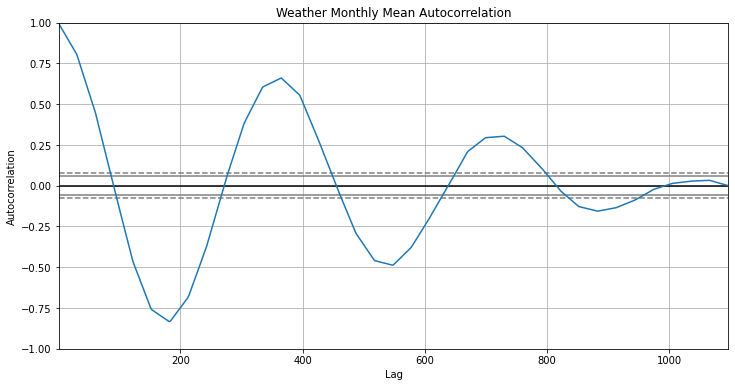

In [24]:
###BY1
from pandas.plotting import autocorrelation_plot 
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(12, 6))

plt.figure()
pd.plotting.autocorrelation_plot(weather_data['Monthly Mean Temp (°C)'])
plt.title('Weather Monthly Mean Autocorrelation')


Text(0.5, 1.0, 'Weather Delta Temt Daily Autocorrelation')

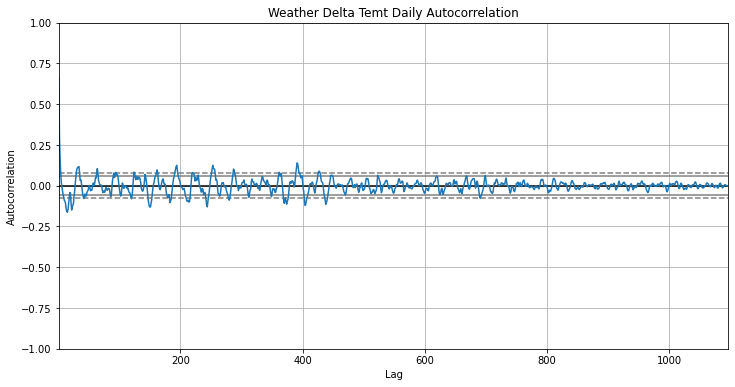

In [25]:
##BY2
plt.figure()
pd.plotting.autocorrelation_plot(weather_data ['Delta Temp (°C)'])
plt.title('Weather Delta Temt Daily Autocorrelation')

# - The following plot actually shows that 'Delta Temp (°C)' for each day.
# - The dotted lines in the below plot actually demostrate that statistical significance of the correlation.
# - The 'Weather Delta Temt Daily Autocorrelation'
#series is genuinely autocorrelated with a lag of every day, but as you move further away,
#there's less and less of a correlation. 
# - Also, there is a correlation of itself at a lag of 0.


In [26]:
go_data

,Date,line_id,line_name,station_name,daily_total
0,2017-03-01,3,Kitchener,Acton GO,94
1,2017-03-02,3,Kitchener,Acton GO,76
2,2017-03-03,3,Kitchener,Acton GO,73
3,2017-03-04,3,Kitchener,Acton GO,0
4,2017-03-05,3,Kitchener,Acton GO,0
...,...,...,...,...,...
69089,2020-02-24,4,Barrie,York University GO,275
69090,2020-02-25,4,Barrie,York University GO,287
69091,2020-02-26,4,Barrie,York University GO,269
69092,2020-02-27,4,Barrie,York University GO,264


In [27]:
go_pivot = go_data.groupby(['line_name','Date'])['daily_total'].sum().to_frame()
go_pivot.reset_index(inplace=True)
go_pivot = go_pivot.pivot(index='Date', columns='line_name', values='daily_total')
go_pivot.fillna(value=0, inplace=True)
go_pivot

line_name,Barrie,Kitchener,Lakeshore East,Lakeshore West,Milton,Richmond Hill,Stouffville,Union Station
Date,,,,,,,,
2017-03-01,10022.0,13585.0,25273.0,32909.0,15599.0,5639.0,8804.0,95802.0
2017-03-02,9932.0,13331.0,26120.0,33884.0,15653.0,5665.0,8736.0,95873.0
2017-03-03,8905.0,12235.0,23801.0,31473.0,14092.0,5129.0,7918.0,87200.0
2017-03-04,928.0,480.0,7872.0,11756.0,208.0,0.0,246.0,13899.0
2017-03-05,803.0,398.0,4714.0,8381.0,169.0,0.0,156.0,8505.0
...,...,...,...,...,...,...,...,...
2020-02-25,13650.0,15097.0,29727.0,36973.0,17192.0,6865.0,10485.0,99431.0
2020-02-26,12596.0,13557.0,26690.0,33732.0,14331.0,6215.0,9749.0,98193.0
2020-02-27,11349.0,13074.0,26818.0,34180.0,15281.0,5522.0,9151.0,94998.0


Text(0.5, 1.0, 'Union Station Daily Autocorrelation')

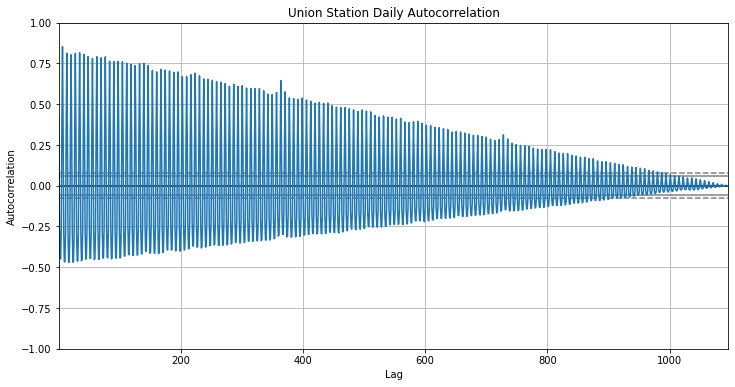

In [28]:
###BY3

plt.figure()
pd.plotting.autocorrelation_plot(go_pivot['Union Station'])
plt.title('Union Station Daily Autocorrelation')


In [29]:
##BY 4
# Resampling the data to get the mean of business month data points for Union Station

UnionStation = go_pivot['Union Station'].resample('BM').mean()
UnionStation.head()


Date
2017-03-31    70456.129032
2017-04-28    67282.392857
2017-05-31    66941.787879
2017-06-30    73548.366667
2017-07-31    65198.483871
Freq: BM, Name: Union Station, dtype: float64

In [30]:
##BY 4
UnionStation.shape[0]

37

Text(0.5, 1.0, 'Union Station Monthly Autocorrelation')

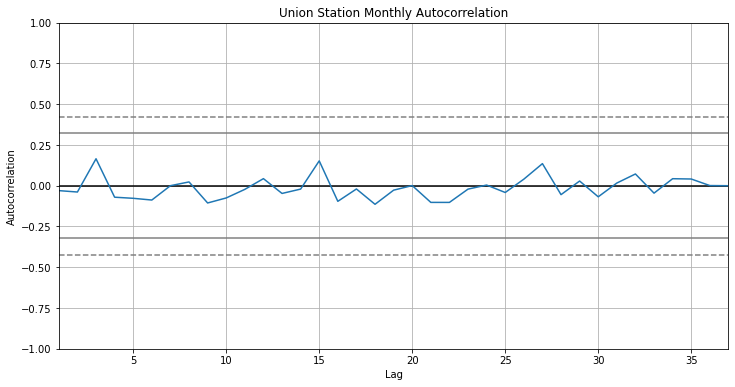

In [31]:
##BY 4
plt.figure()
pd.plotting.autocorrelation_plot(go_pivot['Union Station'].resample('BM').mean())
plt.title('Union Station Monthly Autocorrelation')

# - As we can see from the graph below, the average number of people using Union satatin
# each month that we calculated are not auto-correlated. 
# - The graph is well bellow the 95% confidence band. 
# - The average number of people using Union satatin are random.


In [32]:
dataset = pd.merge(go_pivot, weather_data, how='left', left_on="Date", right_on="Date/Time")
dataset = dataset.rename(columns={'Date/Time':'Date', 'Barrie':'Barrie Ridership', 'Kitchener':'Kitchener Ridership', 'Lakeshore East':'Lakeshore East Ridership', 'Lakeshore West':'Lakeshore West Ridership', 'Milton': 'Milton Ridership', 'Richmond Hill':'Richmond Hill Ridership', 'Stouffville':'Stouffville Ridership', 'Union Station':'Union Station Ridership'})
dataset = dataset[['Date', 'Year', 'Month', 'year_month', 'Day', 'Weekday', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Monthly Mean Temp (°C)', 'Delta Temp (°C)', 'Total Precip (mm)', 'Monthly Mean Precip (mm)' , 'Delta Percip (mm)', 'Snow on Grnd (cm)', 'Barrie Ridership', 'Kitchener Ridership', 'Lakeshore East Ridership', 'Lakeshore West Ridership', 'Milton Ridership', 'Richmond Hill Ridership', 'Stouffville Ridership', 'Union Station Ridership']]
dataset

,Date,Year,Month,year_month,Day,Weekday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Percip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership
0,2017-03-01,2017,3,2017-03,1,Wednesday,13.1,-1.9,5.6,0.116129,5.483871,18.4,2.490323,15.909677,0.0,10022.0,13585.0,25273.0,32909.0,15599.0,5639.0,8804.0,95802.0
1,2017-03-02,2017,3,2017-03,2,Thursday,-1.3,-6.4,-3.9,0.116129,-4.016129,0.2,2.490323,-2.290323,0.5,9932.0,13331.0,26120.0,33884.0,15653.0,5665.0,8736.0,95873.0
2,2017-03-03,2017,3,2017-03,3,Friday,-4.3,-8.1,-6.2,0.116129,-6.316129,0.0,2.490323,-2.490323,0.5,8905.0,12235.0,23801.0,31473.0,14092.0,5129.0,7918.0,87200.0
3,2017-03-04,2017,3,2017-03,4,Saturday,-6.5,-11.9,-9.2,0.116129,-9.316129,0.2,2.490323,-2.290323,0.5,928.0,480.0,7872.0,11756.0,208.0,0.0,246.0,13899.0
4,2017-03-05,2017,3,2017-03,5,Sunday,-0.4,-10.6,-5.5,0.116129,-5.616129,0.0,2.490323,-2.490323,0.5,803.0,398.0,4714.0,8381.0,169.0,0.0,156.0,8505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2020-02-25,2020,2,2020-02,25,Tuesday,5.6,1.7,3.7,-1.906897,5.606897,0.2,2.137931,-1.937931,0.0,13650.0,15097.0,29727.0,36973.0,17192.0,6865.0,10485.0,99431.0
1092,2020-02-26,2020,2,2020-02,26,Wednesday,4.1,-3.2,0.4,-1.906897,2.306897,11.8,2.137931,9.662069,0.0,12596.0,13557.0,26690.0,33732.0,14331.0,6215.0,9749.0,98193.0
1093,2020-02-27,2020,2,2020-02,27,Thursday,-2.7,-5.3,-4.0,-1.906897,-2.093103,3.1,2.137931,0.962069,0.0,11349.0,13074.0,26818.0,34180.0,15281.0,5522.0,9151.0,94998.0
1094,2020-02-28,2020,2,2020-02,28,Friday,-2.5,-9.4,-5.9,-1.906897,-3.993103,1.1,2.137931,-1.037931,0.0,11098.0,13008.0,27785.0,34263.0,14426.0,5629.0,8759.0,95108.0


In [0]:
#BY 5 CORRELATION
from pandas.plotting import autocorrelation_plot, scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(12, 6))

In [34]:
#BY 5 CORRELATION
df_to_analyse = pd.concat([dataset['Delta Temp (°C)'], dataset['Union Station Ridership'],
                           dataset['Delta Percip (mm)'], dataset['Snow on Grnd (cm)']],
                          join='outer', axis = 1)
df_to_analyse.head()


,Delta Temp (°C),Union Station Ridership,Delta Percip (mm),Snow on Grnd (cm)
0,5.483871,95802.0,15.909677,0.0
1,-4.016129,95873.0,-2.290323,0.5
2,-6.316129,87200.0,-2.490323,0.5
3,-9.316129,13899.0,-2.290323,0.5
4,-5.616129,8505.0,-2.490323,0.5


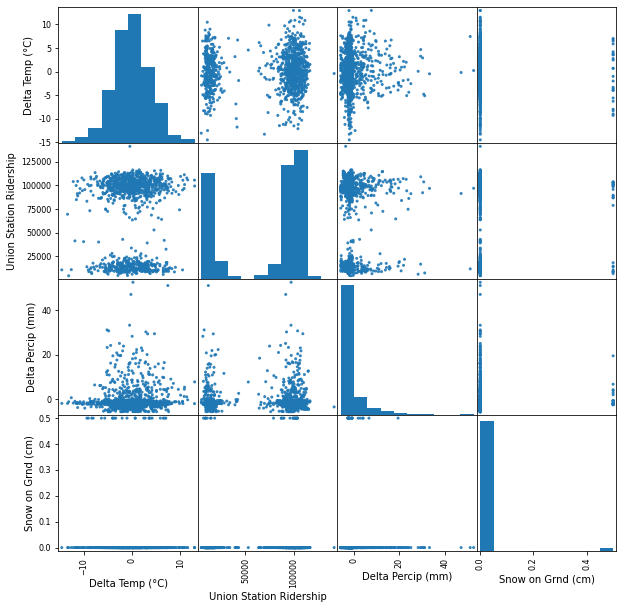

In [35]:
#BY 5 CORRELATION
scatter_matrix(df_to_analyse.dropna(), alpha=0.9, figsize=(10, 10), 
               diagonal='hist');

#The following scatterplot matrix showing all pairwise relationships of the four variables.
# As expected when each each variables are perfectly correlated (ie. correlation = 1)
#to its own, they are not correlated with each other.         

In [36]:
#BY 5 CORRELATION
df_to_analyse_t = df_to_analyse.T
df_to_analyse_t.dropna(axis=1,how='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
Delta Temp (°C),5.483871,-4.016129,-6.316129,-9.316129,-5.616129,1.483871,8.583871,6.683871,1.583871,-5.016129,-9.016129,-8.316129,-8.016129,-8.716129,-6.316129,-2.016129,0.683871,1.483871,3.283871,2.983871,5.283871,-5.116129,-2.516129,6.783871,2.983871,3.783871,10.483871,7.383871,6.283871,2.183871,2.883871,-2.816667,0.683333,-1.516667,-1.916667,-2.516667,-5.116667,-6.916667,-3.116667,1.783333,...,-4.258065,-1.558065,0.941935,2.841935,3.441935,3.141935,1.941935,1.141935,-3.358065,-2.858065,-0.758065,1.506897,3.106897,6.206897,1.706897,-2.693103,-1.493103,-3.593103,-7.893103,-0.993103,4.506897,3.406897,1.706897,-5.393103,-11.493103,-1.893103,3.306897,-0.093103,4.706897,-0.793103,-4.593103,-2.193103,3.006897,6.506897,7.706897,5.606897,2.306897,-2.093103,-3.993103,-6.093103
Union Station Ridership,95802.000000,95873.000000,87200.000000,13899.000000,8505.000000,94530.000000,95390.000000,95333.000000,95241.000000,85324.000000,10584.000000,6721.000000,89689.000000,73303.000000,86804.000000,88756.000000,78920.000000,15697.000000,10312.000000,94492.000000,96195.000000,93427.000000,95742.000000,86855.000000,10008.000000,6691.000000,95245.000000,97467.000000,96317.000000,94577.000000,89241.000000,10555.000000,9139.000000,96200.000000,96529.000000,95371.000000,94333.000000,86417.000000,13959.000000,9467.000000,...,111690.000000,113502.000000,111135.000000,98322.000000,13976.000000,8825.000000,107372.000000,111735.000000,108472.000000,107318.000000,94160.000000,15363.000000,9843.000000,109147.000000,108762.000000,110986.000000,99917.000000,95493.000000,13582.000000,8225.000000,107448.000000,110232.000000,109072.000000,108079.000000,85003.000000,15296.000000,12262.000000,11370.000000,104432.000000,107351.000000,108033.000000,94914.000000,17267.000000,12615.000000,107350.000000,99431.000000,98193.000000,94998.000000,95108.000000,13307.000000
Delta Percip (mm),15.909677,-2.290323,-2.490323,-2.290323,-2.490323,2.309677,7.109677,-2.490323,-2.490323,-2.490323,-2.290323,-2.490323,-1.490323,0.209677,-2.290323,-2.490323,-2.490323,-0.990323,-2.490323,-2.490323,-2.490323,-2.490323,-2.490323,4.209677,4.609677,-0.090323,-0.990323,-2.490323,-2.490323,8.109677,7.609677,-3.580000,-3.580000,2.720000,7.720000,-3.380000,23.320000,-2.380000,-3.380000,-3.580000,...,-4.074194,-4.074194,-3.574194,16.825806,3.825806,-2.774194,-4.074194,-3.674194,-4.074194,-4.074194,-4.074194,-0.037931,3.962069,-1.637931,-2.137931,-1.037931,5.562069,-0.737931,-1.037931,3.662069,-0.937931,-2.137931,-1.237931,0.262069,-1.537931,-1.737931,-1.737931,-1.137931,6.462069,-2.137931,-1.137931,-1.937931,-1.937931,-1.337931,-1.037931,-1.937931,9.662069,0.962069,-1.037931,-0.937931
Snow on Grnd (cm),0.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


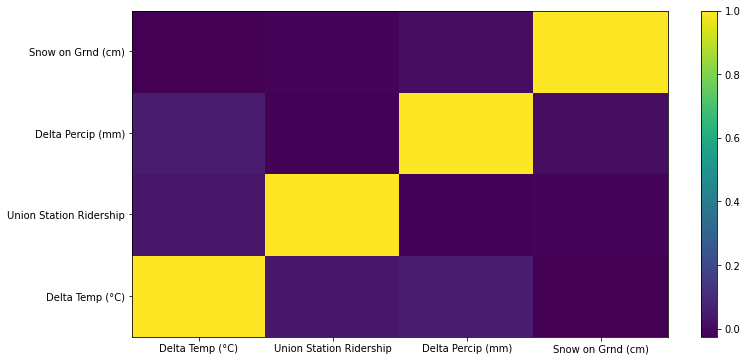

In [37]:
#BY 5 CORRELATION
corr_plt = df_to_analyse_t.dropna(axis=1,how='all').values
from numpy import corrcoef, sum, log, arange
from pylab import pcolor, show, colorbar, xticks, yticks
R = corrcoef(corr_plt)
pcolor(R)
colorbar()
yticks(arange(0.5,4),['Delta Temp (°C)', 'Union Station Ridership','Delta Percip (mm)','Snow on Grnd (cm)'])
xticks(arange(0.5,4),['Delta Temp (°C)', 'Union Station Ridership','Delta Percip (mm)','Snow on Grnd (cm)'])
show()

#We can see along the diagonal that all variables are perfectly 
#correlated with themselves.
# The rest of the matrix indicates that all variables are not correlated 
#each others.

In [0]:
dataset.to_csv("Final Dataset.csv")